In [2]:
import os
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
import pickle
import sys
sys.path.insert(0,'..')
from xbrl.algs.nnmodel import MLLinearNetwork
from xbrl.envs import hlsutils

%matplotlib inline

seed_problem = 9

json_file = "../problem_data/linrep3.json"
with open(json_file, 'r') as f:
    data = json.load(f)
    theta = np.array(data['param'])
    features = np.array(data['features'])
nc, na, dim = features.shape
print(f"dim: {dim}")
true_reward = features @ theta
problem_gen = np.random.RandomState(seed_problem)


rep_list = []
param_list = []
for i in range(2, dim+1):
    fi, pi = hlsutils.derank_hls(features=features, param=theta, newrank=i, transform=True, normalize=True, seed=seed_problem)
    rep_list.append(fi)
    param_list.append(pi)

rep_list.append(features)
param_list.append(theta)

dim: 6


/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)


/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)


/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)


/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)


/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)


/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pirotta/miniconda3/envs/xb.simple/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)


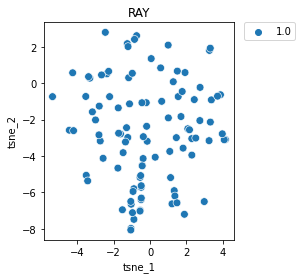

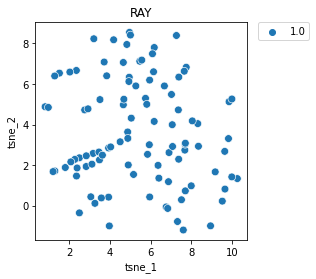

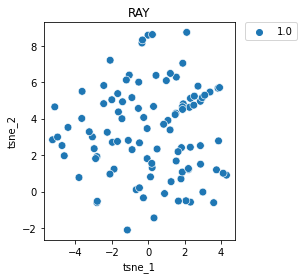

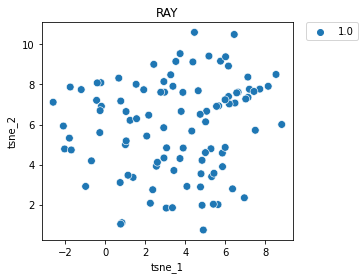

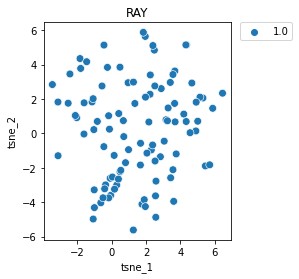

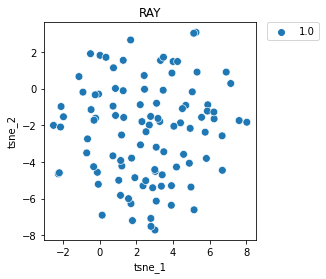

In [3]:
from sklearn.manifold import TSNE, SpectralEmbedding, MDS, Isomap
import seaborn as sns

for i in range(len(rep_list)):
    fi, pi = rep_list[i], param_list[i]
    phi = fi.reshape(-1, dim)
    rewards = fi @ pi

    # We want to get TSNE embedding with 2 dimensions
    n_components = 2
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(phi)
    print(tsne_result.shape)

    opt_phi = np.ones(phi.shape[0])

    tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': opt_phi})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=60)
    # lim = (tsne_result.min()-5, tsne_result.max()+5)
    # ax.set_xlim(lim)
    # ax.set_ylim(lim)
    ax.set_title()
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)